In [10]:
import bz2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import pickle
from pylab import *
from sklearn.preprocessing import StandardScaler

sys.path.append('../models')
import model_utils as util

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use('ggplot')

In [2]:
DATA_PATH = '../../data/cluster/year/'

In [3]:
[[X_train, y_train], 
 [X_valid, y_valid], 
 [X_test, y_test]] = util.load_data(DATA_PATH)

X_train: (529623, 24)
X_valid: (176541, 24)
X_test: (176541, 24)
y_train: (529623, 1)
y_valid: (176541, 1)
y_test: (176541, 1)


In [4]:
def column2matrix(dataframe, column, year, cell_dim=10000):
    '''                                                                          
    Convert a column from DataFrame df into a matrix representation with the     
    upper-left cell indexing beginning at [0, 0].                                
    It is expected that the DataFrame has columns x and y.                       
                                                                                 
    Args:                                                                        
    df: DataFrame: the source data                                               
    column: string: the column name to extract                                   
    cel_dim: numeric: the dimensions of each grid cell                           
                                                                                 
    Returns: np.ndarray (a 2D list; matrix)                                      
    '''
    df = dataframe.copy()
    df = df.loc[df.year == year, :]
    x_min = df.x.min()
    y_min = df.y.min()
    df.x -= x_min
    df.y -= y_min
    xs = sorted(df.x.unique())
    ys = sorted(df.y.unique())
    matrix = np.array([[np.nan for y in range(len(ys))]
                       for x in range(len(xs))])

    for row in df.index:
        x, y, value = df.loc[row, ['x', 'y', column]]
        i = int((x - xs[0]) / cell_dim)
        j = int((y - ys[0]) / cell_dim)
        matrix[i, j] = value

    return matrix

In [18]:
def df2tensor(dataframe, columns, year, cell_dim=10000, verbose=True):
    matrices = []
    for col in columns:
        if verbose: print('Getting matrix for %s...' % col, end='\r')
        matrices.append(column2matrix(dataframe, col, year, cell_dim))
    
    tensor = np.stack(matrices, axis=2)
    if verbose: print('Data returned as tensor of shape:', tensor.shape)
    return tensor

In [6]:
X_train.year.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [22]:
X_test.year.unique()

array([2000, 2001, 2002])

In [7]:
X_train, y_train = util.drop_nans(
    X_train, y_train, 'varPrecip_growingSeason')
X_valid, y_valid = util.drop_nans(
    X_valid, y_valid, 'varPrecip_growingSeason')
X_test,  y_test  = util.drop_nans(
    X_test,  y_test,  'varPrecip_growingSeason')

(526849, 24) (526849, 1)
(176146, 24) (176146, 1)
(175416, 24) (175416, 1)


In [8]:
ignore = ['year', 'studyArea', 'elev_srtm30', 'x', 'y']
fields = [col for col in list(X_test) if col not in ignore]
fields

['meanTemp_Annual',
 'meanTemp_AprAug',
 'meanTemp_Aug',
 'meanMinTemp_DecFeb',
 'meanMinTemp_Oct',
 'meanMinTemp_Jan',
 'meanMinTemp_Mar',
 'meanMaxTemp_Aug',
 'precip_meanAnnual',
 'precip_JunAug',
 'vegetation',
 'precipPrevious_JunAug',
 'precip_OctSep',
 'precipPrevious_OctSep',
 'precip_growingSeason',
 'varPrecip_growingSeason',
 'elev_etopo1',
 'lat',
 'lon']

In [9]:
tensor2006 = df2tensor(X_train, fields, 2006)

Getting matrix for meanTemp_Annual...
Getting matrix for meanTemp_AprAug...
Getting matrix for meanTemp_Aug...
Getting matrix for meanMinTemp_DecFeb...
Getting matrix for meanMinTemp_Oct...
Getting matrix for meanMinTemp_Jan...
Getting matrix for meanMinTemp_Mar...
Getting matrix for meanMaxTemp_Aug...
Getting matrix for precip_meanAnnual...
Getting matrix for precip_JunAug...
Getting matrix for vegetation...
Getting matrix for precipPrevious_JunAug...
Getting matrix for precip_OctSep...
Getting matrix for precipPrevious_OctSep...
Getting matrix for precip_growingSeason...
Getting matrix for varPrecip_growingSeason...
Getting matrix for elev_etopo1...
Getting matrix for lat...
Getting matrix for lon...
Data returned as tensor of shape: (188, 353, 19)


In [11]:
pickle.dump(tensor2006, bz2.open(DATA_PATH + 'tensor2006.pkl.bz2',  'wb'))

In [21]:
def make_and_save_tensor(X, columns, year):
    print('\nMaking tensor for %d' % year)
    tensor = df2tensor(X, columns, year)
    path = DATA_PATH + 'tensor%d.pkl.bz2' % year
    print('Saving tensor to %s...' % path)
    pickle.dump(tensor, bz2.open(path, 'wb'))

In [20]:
for i in range(2007, 2015):
    make_and_save_tensor(X_train, fields, i)

Making tensor for 2007
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2007.pkl.bz2...
Making tensor for 2008
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2008.pkl.bz2...
Making tensor for 2009
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2009.pkl.bz2...
Making tensor for 2010
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2010.pkl.bz2...
Making tensor for 2011
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2011.pkl.bz2...
Making tensor for 2012
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2012.pkl.bz2...
Making tensor for 2013
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2013.pkl.bz2...
Making tensor for 2014
Data returned as tensor of shape

In [23]:
for i in range(2000, 2003):
    make_and_save_tensor(X_test, fields, i)


Making tensor for 2000
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2000.pkl.bz2...

Making tensor for 2001
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2001.pkl.bz2...

Making tensor for 2002
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2002.pkl.bz2...


In [25]:
for i in range(2003, 2006):
    make_and_save_tensor(X_valid, fields, i)


Making tensor for 2003
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2003.pkl.bz2...

Making tensor for 2004
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2004.pkl.bz2...

Making tensor for 2005
Data returned as tensor of shape: (188, 353, 19)
Saving tensor to ../../data/cluster/year/tensor2005.pkl.bz2...


In [27]:
X_train.head()

,year,meanTemp_Annual,meanTemp_AprAug,meanTemp_Aug,meanMinTemp_DecFeb,meanMinTemp_Oct,meanMinTemp_Jan,meanMinTemp_Mar,meanMaxTemp_Aug,precip_meanAnnual,...,precipPrevious_OctSep,precip_growingSeason,varPrecip_growingSeason,elev_etopo1,lat,lon,studyArea,elev_srtm30,x,y
0,2006,17.251705,19.647845,21.807999,4.604394,11.127329,4.604394,8.358201,27.275771,4.635004,...,290.426157,11.500203,1.249081,52,30.505152,-116.039726,1,-2,-1550000.0,-2000000.0
1,2006,17.446967,19.862450,22.002983,4.718982,11.336773,4.718982,8.567711,27.460011,3.939659,...,283.217356,10.452660,1.184982,17,30.523203,-115.938118,1,17,-1540000.0,-2000000.0
2,2006,17.867521,20.496888,22.795315,4.534699,11.345691,4.534699,8.526669,28.691884,3.512120,...,277.213012,9.418130,1.108097,151,30.541141,-115.836475,1,74,-1530000.0,-2000000.0
3,2006,16.746943,19.610817,22.287428,3.149939,9.802370,3.149939,6.784473,28.823934,6.970161,...,336.306701,19.425486,0.755323,500,30.558965,-115.734797,1,466,-1520000.0,-2000000.0
4,2006,16.961347,20.062736,22.893044,2.756497,9.699859,2.756497,6.589031,29.870252,6.902797,...,331.925355,18.605662,0.681859,564,30.576676,-115.633085,1,568,-1510000.0,-2000000.0


In [28]:
def y2matrix(y_dataframe, X_dataframe, year, cell_dim=10000):
    '''                                                                          
    Convert a column from DataFrame df into a matrix representation with the     
    upper-left cell indexing beginning at [0, 0].                                
    It is expected that the DataFrame has columns x and y.                       
                                                                                 
    Args:                                                                        
    df: DataFrame: the source data                                               
    column: string: the column name to extract                                   
    cel_dim: numeric: the dimensions of each grid cell                           
                                                                                 
    Returns: np.ndarray (a 2D list; matrix)                                      
    '''
    df = X_dataframe.copy()
    df = df.loc[df.year == year, :]
    x_min = df.x.min()
    y_min = df.y.min()
    df.x -= x_min
    df.y -= y_min
    xs = sorted(df.x.unique())
    ys = sorted(df.y.unique())
    matrix = np.array([[np.nan for y in range(len(ys))]
                       for x in range(len(xs))])

    for row in df.index:
        x, y = df.loc[row, ['x', 'y']]
        value = y_dataframe.loc[row, 'beetle']
        i = int((x - xs[0]) / cell_dim)
        j = int((y - ys[0]) / cell_dim)
        matrix[i, j] = value

    return matrix

In [31]:
def make_and_save_y_matrix(y, X, year):
    print('\nMaking y matrix for %d' % year)
    tensor = y2matrix(y, X, year)
    path = DATA_PATH + 'y_matrix%d.pkl.bz2' % year
    print('Saving matrix to %s...' % path)
    pickle.dump(tensor, bz2.open(path, 'wb'))

In [32]:
for i in range(2000, 2003):
    make_and_save_y_matrix(y_test, X_test, i)


Making y matrix for 2000
Saving matrix to ../../data/cluster/year/y_matrix2000.pkl.bz2...

Making y matrix for 2001
Saving matrix to ../../data/cluster/year/y_matrix2001.pkl.bz2...

Making y matrix for 2002
Saving matrix to ../../data/cluster/year/y_matrix2002.pkl.bz2...


In [33]:
for i in range(2003, 2006):
    make_and_save_y_matrix(y_valid, X_valid, i)


Making y matrix for 2003
Saving matrix to ../../data/cluster/year/y_matrix2003.pkl.bz2...

Making y matrix for 2004
Saving matrix to ../../data/cluster/year/y_matrix2004.pkl.bz2...

Making y matrix for 2005
Saving matrix to ../../data/cluster/year/y_matrix2005.pkl.bz2...


In [34]:
for i in range(2006, 2015):
    make_and_save_y_matrix(y_train, X_train, i)


Making y matrix for 2006
Saving matrix to ../../data/cluster/year/y_matrix2006.pkl.bz2...

Making y matrix for 2007
Saving matrix to ../../data/cluster/year/y_matrix2007.pkl.bz2...

Making y matrix for 2008
Saving matrix to ../../data/cluster/year/y_matrix2008.pkl.bz2...

Making y matrix for 2009
Saving matrix to ../../data/cluster/year/y_matrix2009.pkl.bz2...

Making y matrix for 2010
Saving matrix to ../../data/cluster/year/y_matrix2010.pkl.bz2...

Making y matrix for 2011
Saving matrix to ../../data/cluster/year/y_matrix2011.pkl.bz2...

Making y matrix for 2012
Saving matrix to ../../data/cluster/year/y_matrix2012.pkl.bz2...

Making y matrix for 2013
Saving matrix to ../../data/cluster/year/y_matrix2013.pkl.bz2...

Making y matrix for 2014
Saving matrix to ../../data/cluster/year/y_matrix2014.pkl.bz2...


In [37]:
y_train_2006 = pickle.load(bz2.open(DATA_PATH + 'y_matrix2006.pkl.bz2',  'rb'))

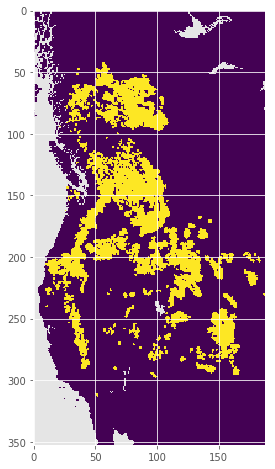

In [38]:
imshow(np.rot90(y_train_2006));

For the _convolutional neural network_ model, the response is still presence/absence of beetles in each grid cell, but the predictors come not just from the grid cell in question but also from the grid cells in the surrounding _n_ rows and columns around the cell in question.  For example, if _n_ = 3, then the cell and the cells within a 3-row/column buffer will all be used as predictors.<br/>

Specifically if the reponse cell is at matrix location [i, j], the the included predictors will come from all cells in the bounding box `[(i - n, j - n), (i + n, j + n)]`, or in numpy notation:<br/>
```
tensor[range(i - n, i + n + 1), range(j - n, j + n + 1), :]
```

(7, 7, 19)


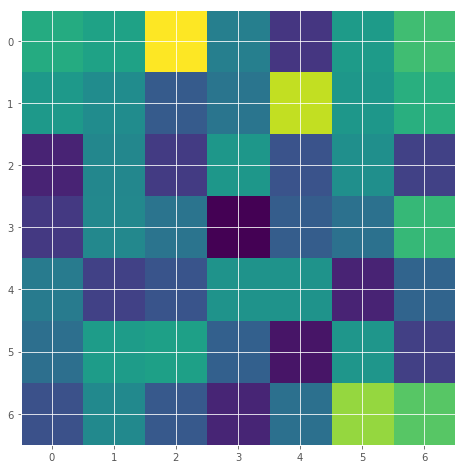

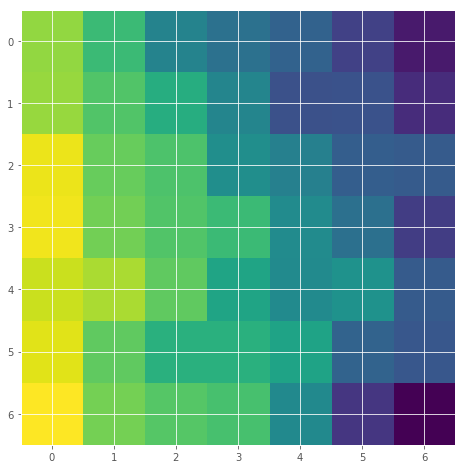

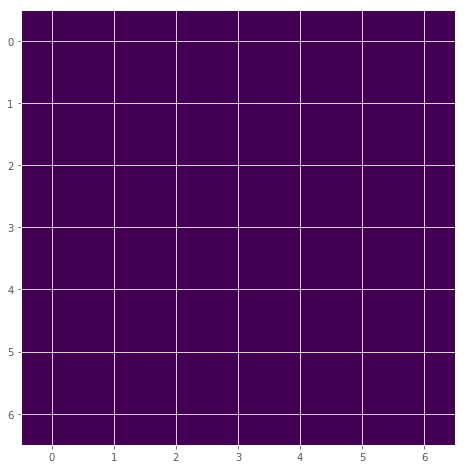

In [40]:
# Example:
# Cell = (90, 150)
# n = 3
# Should return tensor for cells [(87, 147), (93, 153)]
x = 90
y = 150
n = 3
sample = tensor2006[(x-n):(x+n+1), (y-n):(y+n+1), :]
print(sample.shape)
plt.figure();
imshow(np.rot90(sample[:, :, 0]));  # meanTemp_Annual
plt.figure();
imshow(np.rot90(sample[:, :, 8]));  # precip_meanAnnual
plt.figure();
imshow(np.rot90(sample[:, :, 10])); # vegetation

In [ ]:
# Don't forget to normalize data